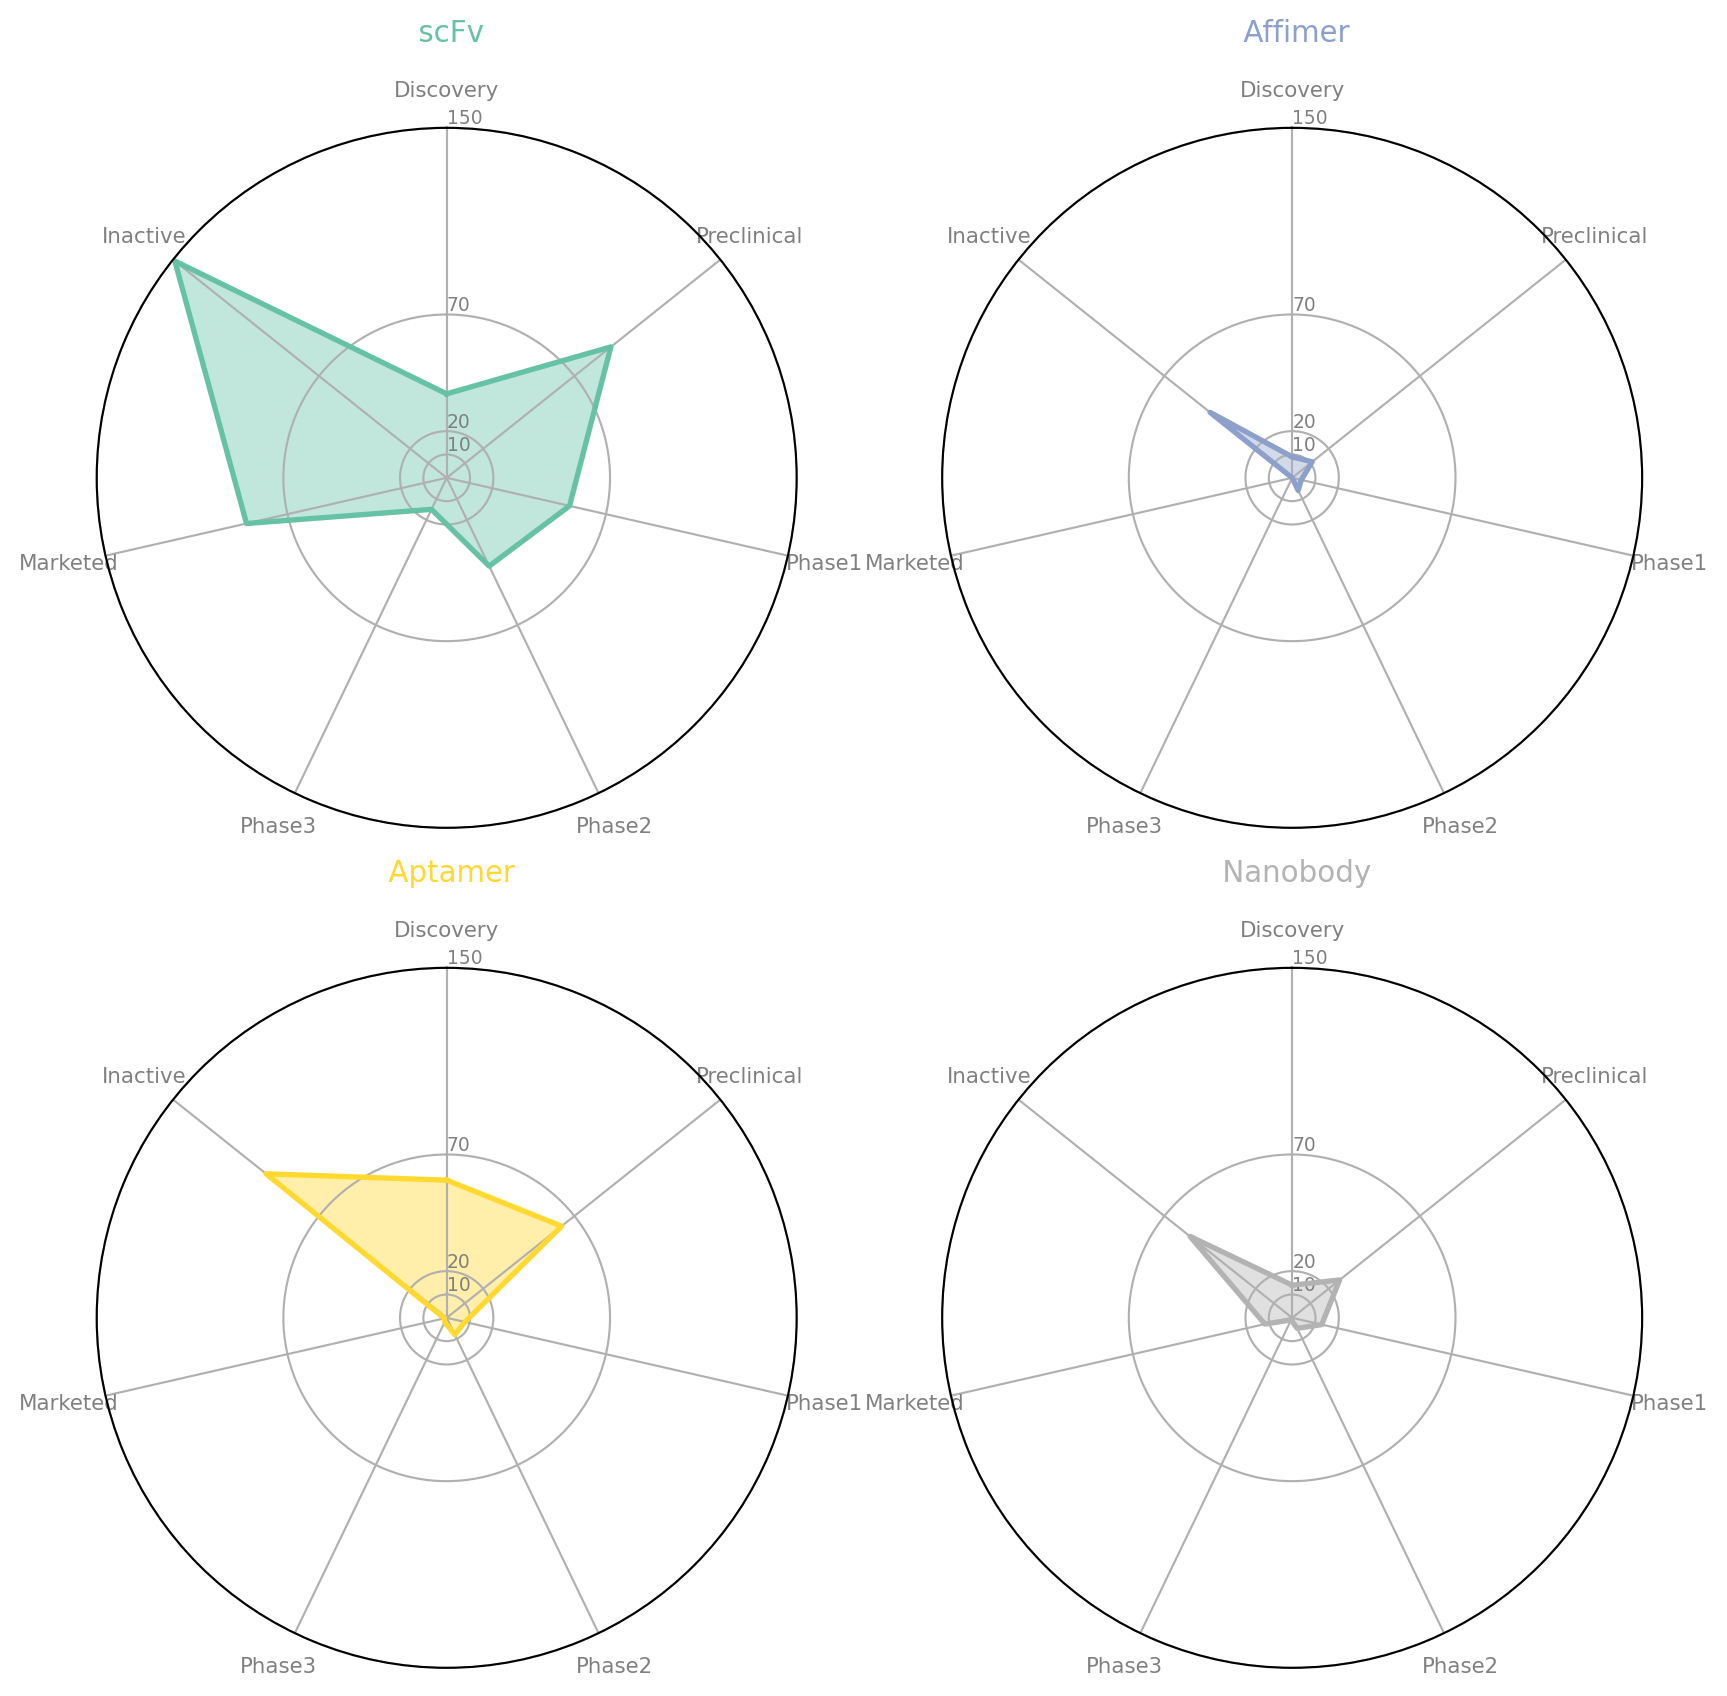

In [17]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Set data
df = pd.DataFrame({
'group': ['scFv','Affimer','Aptamer','Nanobody'],
'Discovery': [36, 9, 59, 14],
'Preclinical': [90, 11, 63, 26],
'Phase1': [54, 4, 8, 13],
'Phase2': [42, 6, 8, 5],
'Phase3': [15, 0, 2, 1],
'Marketed': [88, 0, 1, 12],
'Inactive': [149, 45, 99, 56]
})
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):

    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,70,150], ["10","20","70","150"], color="grey", size=7)
    plt.ylim(0,150)

    # Ind1
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title=' '+df['group'][row], color=my_palette(row))

In [4]:
df

,group,Discovery,Preclinical,Phase1,Phase2,Phase3,Marketed,Inactive
0,scFv,36,90,54,42,15,88,149
1,Affimer,9,11,4,6,0,0,45
2,Aptamer,59,63,8,8,2,1,99
3,Nanobody,14,26,13,5,1,12,56


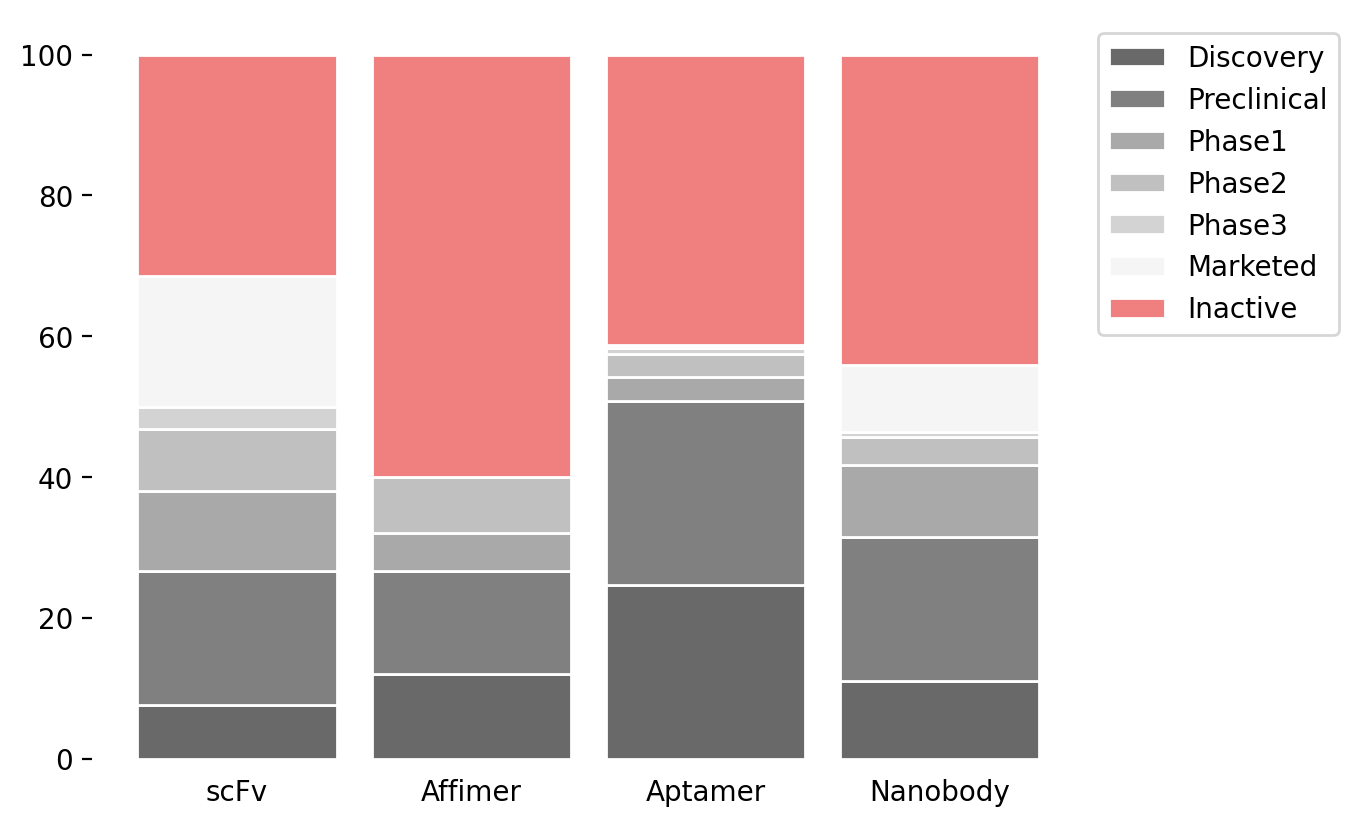

In [23]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 

r = [0,1,2,3]
    
# Set data
df = pd.DataFrame({
'group': ['scFv','Affimer','Aptamer','Nanobody'],
'Discovery': [36, 9, 59, 14],
'Preclinical': [90, 11, 63, 26],
'Phase1': [54, 4, 8, 13],
'Phase2': [42, 6, 8, 5],
'Phase3': [15, 0, 2, 1],
'Marketed': [88, 0, 1, 12],
'Inactive': [149, 45, 99, 56]
})

raw_data = {'Discovery': [36, 9, 59, 14], 'Preclinical': [90, 11, 63, 26],'Phase1': [54, 4, 8, 13],
            'Phase2': [42, 6, 8, 5],'Phase3': [15, 0, 2, 1], 'Marketed': [88, 0, 1, 12], 'Inactive': [149, 45, 99, 56]}
df = pd.DataFrame(raw_data)

# From raw value to percentage
totals = [i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(df['Discovery'], df['Preclinical'], df['Phase1'],
                                df['Phase2'], df['Phase3'], df['Marketed'],df['Inactive'])]
DiscoveryBars = [i / j * 100 for i,j in zip(df['Discovery'], totals)]
PreclinicalBars = [i / j * 100 for i,j in zip(df['Preclinical'], totals)]
Phase1Bars = [i / j * 100 for i,j in zip(df['Phase1'], totals)]
Phase2Bars = [i / j * 100 for i,j in zip(df['Phase2'], totals)]
Phase3Bars = [i / j * 100 for i,j in zip(df['Phase3'], totals)]
MarketedBars = [i / j * 100 for i,j in zip(df['Marketed'], totals)]
InactiveBars = [i / j * 100 for i,j in zip(df['Inactive'], totals)]


# plot
barWidth = 0.85
names = ('scFv','Affimer','Aptamer','Nanobody')

# Create green Bars
plt.bar(r, DiscoveryBars, color='dimgray', edgecolor='white', width=barWidth, label="Discovery")
# Create orange Bars
plt.bar(r, PreclinicalBars, bottom=DiscoveryBars, color='grey', edgecolor='white', width=barWidth, label="Preclinical")
# Create blue Bars
plt.bar(r, Phase1Bars, bottom=[i+j for i,j in zip(DiscoveryBars, PreclinicalBars)], color='darkgrey'
        , edgecolor='white', width=barWidth, label="Phase1")
plt.bar(r, Phase2Bars, bottom=[i+j+k for i,j,k in zip(DiscoveryBars, PreclinicalBars, Phase1Bars)], color='silver'
        , edgecolor='white', width=barWidth, label="Phase2")
plt.bar(r, Phase3Bars, bottom=[i+j+k+l for i,j,k,l in zip(
    DiscoveryBars, PreclinicalBars, Phase1Bars, Phase2Bars)], color='lightgrey'
        , edgecolor='white', width=barWidth, label="Phase3")
plt.bar(r, MarketedBars, bottom=[i+j+k+l+m for i,j,k,l,m in zip(
    DiscoveryBars, PreclinicalBars, Phase1Bars, Phase2Bars, Phase3Bars)], color='whitesmoke'
        , edgecolor='white', width=barWidth, label="Marketed")
plt.bar(r, InactiveBars, bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(
    DiscoveryBars, PreclinicalBars, Phase1Bars, Phase2Bars, Phase3Bars,MarketedBars)], color='lightcoral'
        , edgecolor='white', width=barWidth, label="Inactive")
# Custom x axis
plt.xticks(r, names)
 
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

# plt.show()
# remove all the ticks and directly label each bar with respective value
# plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

# Show graphic
plt.show()